# Springboard Apps project - Tier 3

Welcome to the Apps project! To give you a taste of your future career, we're going to walk through exactly the kind of notebook that you'd write as a data scientist. In the process, we'll be sure to signpost the general framework for our investigation - the Data Science Pipeline - as well as give reasons for why we're doing what we're doing. We're also going to apply some of the skills and knowledge you've built up in the previous unit when reading Professor Spiegelhalter's *The Art of Statistics* (hereinafter *AoS*). 

So let's get cracking!

**Brief**

Did Apple Store apps receive better reviews than Google Play apps?

## Stages of the project

1. Sourcing and loading 
    * Load the two datasets
    * Pick the columns that we are going to work with 
    * Subsetting the data on this basis 
 
 
2. Cleaning, transforming and visualizing
    * Check the data types and fix them
    * Add a `platform` column to both the `Apple` and the `Google` dataframes
    * Changing the column names to prepare for a join 
    * Join the two data sets
    * Eliminate the `NaN` values
    * Filter only those apps that have been reviewed at least once
    * Summarize the data visually and analytically (by the column `platform`)  
  
  
3. Modelling 
    * Hypothesis formulation
    * Getting the distribution of the data
    * Permutation test 


4. Evaluating and concluding 
    * What is our conclusion?
    * What is our decision?

## Importing the libraries

In this case we are going to import pandas, numpy, scipy.stats, scipy.stats.norm, random, matplotlib.pyplot, and seaborn

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set plot style
%matplotlib inline
sns.set(style = 'whitegrid', font_scale = 1.5)

from scipy import stats
from scipy.stats import norm
import random

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Stage 1 -  Loading data

In [2]:
# Read Google data

google = pd.read_csv('googleplaystore.csv')

google.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
# Read Apple data

apple = pd.read_csv('AppleStore.csv')

apple.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


### 1b. Pick the columns we'll work with

From the documentation of these datasets, we can infer that the most appropriate columns to answer the brief are:

1. Google:
    * `Category`
    * `Rating`
    * `Reviews`
    * `Price`
2. Apple:    
    * `prime_genre`
    * `user_rating` 
    * `rating_count_tot`
    * `price`

### 1c. Subsetting accordingly

Let's select only those columns that we want to work with from both datasets. We'll overwrite the subsets in the original variables.

In [4]:
# Select only the relevant features from google dataset

google.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
google = google[['Category', 'Price', 'Reviews', 'Rating']]

google.head()

,Category,Price,Reviews,Rating
0,ART_AND_DESIGN,0,159,4.1
1,ART_AND_DESIGN,0,967,3.9
2,ART_AND_DESIGN,0,87510,4.7
3,ART_AND_DESIGN,0,215644,4.5
4,ART_AND_DESIGN,0,967,4.3


In [6]:
# Select only the relevant features from apple

apple.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [7]:
apple = apple[['prime_genre', 'price', 'rating_count_tot', 'user_rating']]
apple.head()

,prime_genre,price,rating_count_tot,user_rating
0,Games,3.99,21292,4.0
1,Productivity,0.00,161065,4.0
2,Weather,0.00,188583,3.5
3,Shopping,0.00,262241,4.0
4,Reference,0.00,985920,4.5


## Stage 2 -  Cleaning, transforming and visualizing

### 2a. Check the data types for both Apple and Google, and fix them

Types are crucial for data science in Python. Let's determine whether the variables we selected in the previous section belong to the types they should do, or whether there are any errors here.

In [8]:
# check google info

google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  10841 non-null  object 
 1   Price     10841 non-null  object 
 2   Reviews   10841 non-null  object 
 3   Rating    9367 non-null   float64
dtypes: float64(1), object(3)
memory usage: 338.9+ KB


Observations for Google data
- There are missing values in Rating
- Price and Reviews (# of reviews) appear to be strings --> need to convert to float and int, respectively

In [9]:
# check applle info

apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prime_genre       7197 non-null   object 
 1   price             7197 non-null   float64
 2   rating_count_tot  7197 non-null   int64  
 3   user_rating       7197 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 225.0+ KB


Observations for Apple data
- There are no missing values
- All features appear to be in the correct format

### Clean and convert google data to appropriate data types

In [10]:
# check unique price values
google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

### Two things that need to be fixed
- Value 'Everyone' is clearly a mistake - need to check how many such values there are and possibly remove them
- The $ symbol also needs to be removed

In [11]:
google[google['Price'] == 'Everyone']

,Category,Price,Reviews,Rating
10472,1.9,Everyone,3.0M,19.0


In [12]:
# there is only one such record --> remove it

google = google[google['Price'] != 'Everyone']

# check again unique price values
google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [13]:
# remove the $ symbol in price and convert to float data type

google['Price'] = google['Price'].str.replace('$','').astype('float')
google['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [14]:
# confirm data type for google['Price']
google['Price'].dtype

dtype('float64')

In [15]:
# convert google['Reviews'] to int data type
google['Reviews'] = google['Reviews'].astype('int')

google['Reviews'].dtype

dtype('int32')

In [16]:
# get rid of the missing values in google data, reset indices, and confirm that the correction changes have been made

google.dropna(inplace=True)
google.reset_index(drop=True, inplace=True)

google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9366 entries, 0 to 9365
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  9366 non-null   object 
 1   Price     9366 non-null   float64
 2   Reviews   9366 non-null   int32  
 3   Rating    9366 non-null   float64
dtypes: float64(2), int32(1), object(1)
memory usage: 256.2+ KB


Google data is cleaned and its features have the correct data type.

### 2b. Add a `platform` column to both the `Apple` and the `Google` dataframes
Let's add a new column to both dataframe objects called `platform`: all of its values in the Google dataframe will be just 'google', and all of its values for the Apple dataframe will be just 'apple'. 

The reason we're making this column is so that we can ultimately join our Apple and Google data together, and actually test out some hypotheses to solve the problem in our brief.

In [17]:
# create 'platform' column in each dataset to indicate whether this is apple or google record

google['platform'] = 'google'
google.head()

,Category,Price,Reviews,Rating,platform
0,ART_AND_DESIGN,0.0,159,4.1,google
1,ART_AND_DESIGN,0.0,967,3.9,google
2,ART_AND_DESIGN,0.0,87510,4.7,google
3,ART_AND_DESIGN,0.0,215644,4.5,google
4,ART_AND_DESIGN,0.0,967,4.3,google


In [18]:
apple['platform'] = 'apple'
apple.head()

,prime_genre,price,rating_count_tot,user_rating,platform
0,Games,3.99,21292,4.0,apple
1,Productivity,0.00,161065,4.0,apple
2,Weather,0.00,188583,3.5,apple
3,Shopping,0.00,262241,4.0,apple
4,Reference,0.00,985920,4.5,apple


### 2c. Changing the column names to prepare for joining the two datasets 
Since the easiest way to join two datasets is if they have both:
- the same number of columns
- the same column names
we need to rename the columns of `Apple` so that they're the same as the ones of `Google`, or vice versa.

In this case, we're going to change the `Apple` columns names to the names of the `Google` columns. 

This is an important step to unify the two datasets!

In [19]:
# rename apple column names to match google column names
old_names = apple.columns
new_names = google.columns

apple.rename(columns = dict(zip(old_names,new_names)), inplace = True)

apple.head()

,Category,Price,Reviews,Rating,platform
0,Games,3.99,21292,4.0,apple
1,Productivity,0.00,161065,4.0,apple
2,Weather,0.00,188583,3.5,apple
3,Shopping,0.00,262241,4.0,apple
4,Reference,0.00,985920,4.5,apple


### 2d. Join the two datasets 
Combine the two datasets into a single data frame called `data`.

In [20]:
# join the two datasets into one and check by picking a random sample of 10 entries from the combined data

data = google.append(apple, ignore_index = True)
data.sample(10)

,Category,Price,Reviews,Rating,platform
1926,GAME,0.00,4921409,4.4,google
5534,FINANCE,3.99,23,4.2,google
11199,Lifestyle,1.99,964,4.5,apple
12133,Games,0.00,7674,3.5,apple
8231,PERSONALIZATION,0.00,4,5.0,google
16159,Games,4.99,44,4.0,apple
8503,MEDICAL,0.00,267,4.3,google
15608,Games,2.99,21,4.5,apple
10727,Games,0.00,69624,4.5,apple
521,DATING,0.00,241,3.5,google


### 2e. Filter the data so that we only have apps that have been reviewed at least once

Apps that haven't been reviewed can't help solve our brief. 

Check to see if any apps have no reviews at all.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16563 entries, 0 to 16562
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  16563 non-null  object 
 1   Price     16563 non-null  float64
 2   Reviews   16563 non-null  int64  
 3   Rating    16563 non-null  float64
 4   platform  16563 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 647.1+ KB


In [22]:
# check how many apps don't have reviews

data[data['Reviews'] == 0].count()

Category    929
Price       929
Reviews     929
Rating      929
platform    929
dtype: int64

In [23]:
# eliminate these apps

data = data[data['Reviews'] != 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15634 entries, 0 to 16562
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  15634 non-null  object 
 1   Price     15634 non-null  float64
 2   Reviews   15634 non-null  int64  
 3   Rating    15634 non-null  float64
 4   platform  15634 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 732.8+ KB


### 2g. Summarize the data visually and analytically (by the column `platform`)

For our brief we need a summary of the `Rating` column separated by the different platforms.

In [24]:
# get the statistics for apple and google ratings
data.groupby(by = 'platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


The means of 4.049697 and 4.191757 don't **seem** all that different! Perhaps we've solved our brief already: there's no significant difference between Google Play app reviews and Apple Store app reviews. We have an ***observed difference*** here: which is simply (4.191757 - 4.049697) = 0.14206. This is the actual difference between the mean rating for apps from Google Play and the mean rating for apps from the Apple Store. Let's look at how we're going to use this observed difference to solve our problem using a statistical test. 

**Method outline:**
1. We'll assume that platform (i.e, whether the app was Google or Apple) really doesn’t have an impact on ratings. 


2. Given this assumption, we should actually be able to get a difference in mean rating for Apple apps and mean rating for Google apps that's pretty similar to the one we actually got (0.14206) just by: 
a. shuffling the ratings column, 
b. keeping the platform column the same,
c. calculating the difference between the mean rating for Apple and the mean rating for Google. 


3. We can make the shuffle more useful by doing it many times, each time calculating the mean rating for Apple apps and the mean rating for Google apps, and the difference between these means. 


4. We can then take the mean of all these differences, and this will be called our permutation difference. This permutation difference will be great indicator of what the difference would be if our initial assumption were true and platform really doesn’t impact on ratings. 


5. Now we do a comparison. If the observed difference looks just like the permutation difference, then we stick with the claim that actually, platform doesn’t impact on ratings. If instead, however, the permutation difference differs significantly from the observed difference, we'll conclude: something's going on; the platform does in fact impact on ratings. 


Get a **visual summary** of the `Rating` column, separated by the different platforms. A good tool is boxplot.

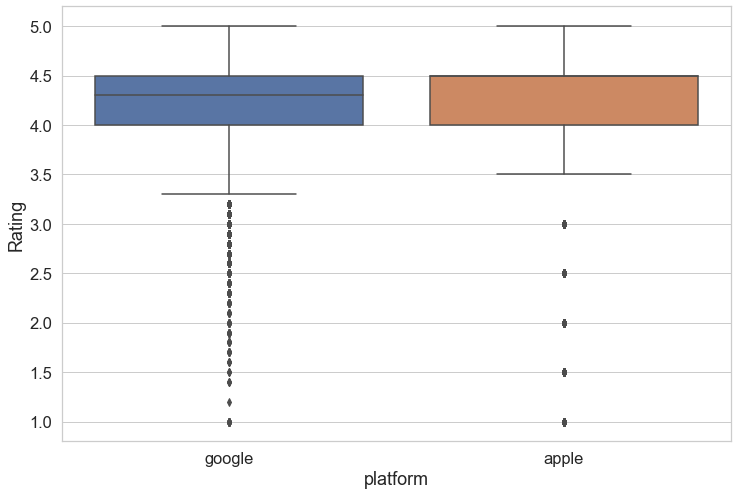

In [25]:
# create boxplot for the ratings

plt.figure(figsize = (12, 8))
sns.boxplot(data['platform'], data['Rating'])
plt.show()

Here we see the same information as in the analytical summary, but with a boxplot.

## Stage 3 - Modelling

### 3a. Hypothesis formulation

Our **Null hypothesis** is just:

**H<sub>null</sub>**: the observed difference in the mean rating of Apple Store and Google Play apps is due to chance (and thus not due to the platform).

The more interesting hypothesis is called the **Alternate hypothesis**:

**H<sub>alternative</sub>**: the observed difference in the average ratings of apple and google users is not due to chance (and is actually due to platform)

We're also going to pick a **significance level** of 0.05. 

### 3b. Getting the distribution of the data
Now that the hypotheses and significance level are defined, we can select a statistical test to determine which hypothesis to accept. 

There are many different statistical tests, all with different assumptions. You'll generate an excellent judgment about when to use which statistical tests over the Data Science Career Track course. But in general, one of the most important things to determine is the **distribution of the data**.

In [26]:
# create two separate rating subsets from google and apple

apple = data[data['platform'] == 'apple']['Rating']
google = data[data['platform'] == 'google']['Rating']

In [27]:
# Using the stats.normaltest() method, verify whether the two subsets are normally distributed or not

print('Apple - ', stats.normaltest(apple))
print('Google - ', stats.normaltest(google))

Apple -  NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)
Google -  NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)


Since the null hypothesis of the normaltest() is that the data are normally distributed, the lower the p-value in the result of this test, the more likely the data are to be non-normal. 

Since the p-values is 0 for both tests, regardless of what we pick for the significance level, our conclusion is that the data are not normally distributed. 

We can actually also check out the distribution of the data visually with a histogram. A normal distribution has the following visual characteristics:
    - symmetric
    - unimodal (one hump)
As well as a roughly identical mean, median and mode.

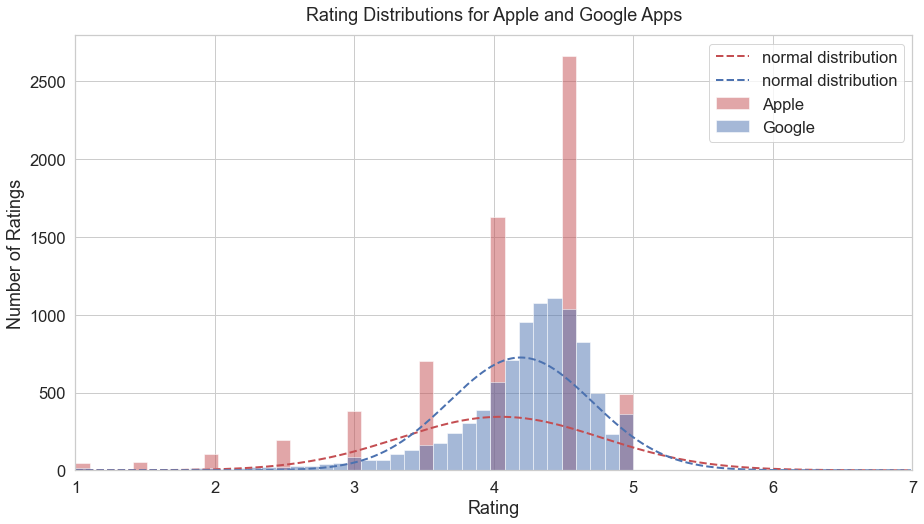

In [28]:
# plot their histograms in one plot
# for comparison also plot the theoretical normal distributions using the corresponding mean and std as parameters

# set bin size
bin_size = 0.1

# Set x-axis limits - adjust accordingly
x_min = 1
x_max = 5

# calculate number of bins
n_bins = int((x_max - x_min) // bin_size)
    
# define x-values for the corresponding theoretical normal distribution
x_th = np.arange(1, 7, 0.01)
# set scaling factors for the theoretical normal distributions to match the area of the real distributions
a_1 = len(apple) * bin_size
a_2 = len(google) * bin_size
    
plt.figure(figsize = (15, 8))
plt.hist(apple, bins = n_bins, color = 'r', alpha = 0.5, label = 'Apple')
plt.plot(x_th, a_1 * norm.pdf(x_th, loc = apple.mean(), scale = apple.std()), color = 'r', lw = 2, 
             linestyle = '--', label = 'normal distribution')
plt.hist(google, bins = n_bins, color = 'b', alpha = 0.5, label = 'Google')
plt.plot(x_th, a_2 * norm.pdf(x_th, loc = google.mean(), scale = google.std()), color = 'b', lw = 2, 
             linestyle = '--', label = 'normal distribution')
plt.xlim(1, 7)
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Rating Distributions for Apple and Google Apps', pad = 15)
plt.legend()

plt.show()

- The histograms confirm that the ratings distributions are not normal. 
- It is also interesting that Google apps ratings are in increments of 0.1, while the Apple ratings are in increments of 0.5.

### 3c. Permutation test
Since the data aren't normally distributed, we're using a *non-parametric* test here. This is simply a label for statistical tests used when the data aren't normally distributed. These tests are extraordinarily powerful due to how few assumptions we need to make.

In [29]:
# Create an ensemble of the difference between the mean rating for apple and google from 10000 permutations
# Since the permutation scrambles the data randomly any rating could belong with equal likelihood to either Apple or Google
# As a result the distribution of this difference will correspond to the Null hypothesis

delta_0 = np.array([np.random.permutation(data['Rating'])[data['platform']=='apple'].mean() - 
                np.random.permutation(data['Rating'])[data['platform']=='google'].mean() for i in range(10000)])

In [30]:
# get the true delta

delta_true = apple.mean() - google.mean()
print('True delta: ', round(delta_true, 4))

True delta:  -0.1421


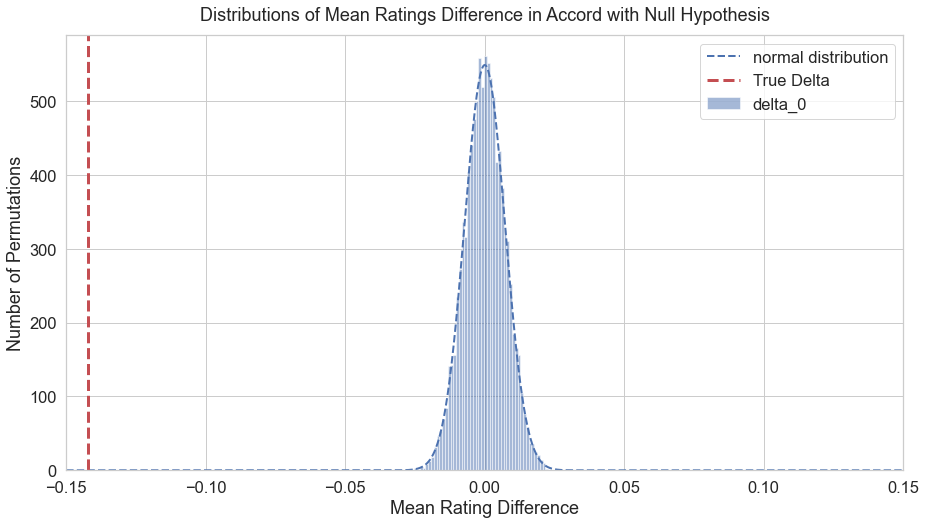

In [31]:
# plot histogram and compare to true delta

# set bin size
bin_size = 0.001

# Set x-axis limits - adjust accordingly
x_min = delta_0.min()
x_max = delta_0.max()
d_x = 0.0001

# calculate number of bins
n_bins = int((x_max - x_min) // bin_size)
    
# define x-values for the corresponding theoretical normal distribution
x_th = np.arange(int(x_min) - 1, int(x_max) + 1, d_x)
# set scaling factors for the theoretical normal distributions to match the area of the real distributions
a = len(delta_0) * bin_size
    
plt.figure(figsize = (15, 8))
plt.hist(delta_0, bins = n_bins, color = 'b', alpha = 0.5, label = 'delta_0')
plt.plot(x_th, a * norm.pdf(x_th, loc = delta_0.mean(), scale = delta_0.std()), color = 'b', lw = 2, 
             linestyle = '--', label = 'normal distribution')
plt.axvline(delta_true, color='r', linestyle = '--', lw = 3, label = 'True Delta')
plt.xlim(-0.15, 0.15)
plt.xlabel('Mean Rating Difference')
plt.ylabel('Number of Permutations')
plt.title('Distributions of Mean Ratings Difference in Accord with Null Hypothesis', pad = 15)
plt.legend()

plt.show()

The difference between the real means of the ratings for Apple and Google is well outside the distribution expected from the Null hypothesis. This results indicate that the Null hypothesis is not true and there is a statistically significant difference between the mean ratings.

We can also confirm this by obtaining the p-value for observing the true difference if the Null hypothesis is assumed to be correct.

In [32]:
# calculate the p-value for observing the true delta

# obtain t statistics
t_s = delta_true / delta_0.std()

# calculate p-value
p = norm.cdf(t_s)
print('p-value = ', p)

p-value =  2.1224137453015287e-85


The resulting p-value is infinitesimally small, thus confirming that the Null hypothesis is not true.

## Stage 4 -  Evaluating and concluding
### 4a. What is our conclusion?
- The observed difference in the mean rating for Apple and Google apps is statistically significant, which means that, despite the seemingly small difference, on average the apps for one platform have better ratings

### 4b. What is our decision?
- Since the mean rating for Google apps is greater than that for Apple apps and, as shown, there is a statistically singnificant difference between their average ratings, our recommendation is to purchase Google apps.
